Fuente: https://www.kaggle.com/teampycaret/mobile-price-prediction-multiclass-using-pycaret

## **Contexto del Problema**

Bob ha iniciado su propia empresa de telefonía móvil. Quiere dar una dura batalla a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que crea su empresa. En este competitivo mercado de la telefonía móvil, no se pueden simplemente asumir cosas. Para solucionar este problema, recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere averiguar alguna relación entre las características de un teléfono móvil (por ejemplo: - RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Entonces necesita tu ayuda para resolver este problema.

En este problema, no tiene que predecir el precio real, sino un rango de precios que indica qué tan alto es el precio.
Nota: Si se buscara predecir el precio exacto sería un problema de regresión

# Carga del dataset

In [2]:
import pandas as pd
train = pd.read_csv('data/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Instalación de PyCaret

In [2]:
!pip install pycaret

     |████████████████████████████████| 188 kB 6.3 MB/s 
     |████████████████████████████████| 7.0 MB 12.6 MB/s 
     |████████████████████████████████| 92 kB 300 kB/s 
     |████████████████████████████████| 378 kB 55.3 MB/s 
     |████████████████████████████████| 3.0 MB 58.3 MB/s 
     |████████████████████████████████| 60 kB 4.8 MB/s 
     |████████████████████████████████| 7.3 MB 41.8 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 259 kB 43.4 MB/s 
     |████████████████████████████████| 127 kB 56.7 MB/s 
     |████████████████████████████████| 63.9 MB 64.9 MB/s 
     |████████████████████████████████| 142.8 MB 36 kB/s 
     |████████████████████████████████| 2.1 MB 42.2 MB/s 
     |████████████████████████████████| 6.1 MB 43.0 MB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 234 kB 57.7 MB/s 
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for pyod

# Inicilización del Entorno

In [3]:
from pycaret.classification import *
clf1 = setup(data = train, target = 'price_range', session_id = 786, silent = True)

#silent is True to perform unattended run when kernel is executed.

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(2000, 21)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Comparación de Modelos

In [4]:
%%time
compare_models()

CPU times: user 6min 55s, sys: 40.4 s, total: 7min 35s
Wall time: 2min 55s


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,K Neighbors Classifier,0.9185,0,0.9185,0.9201,0.9183,0.8913
1,CatBoost Classifier,0.9178,0,0.9177,0.9195,0.9177,0.8904
2,Light Gradient Boosting Machine,0.9028,0,0.9027,0.904,0.9025,0.8703
3,Extreme Gradient Boosting,0.8763,0,0.8763,0.8801,0.8765,0.8351
4,Gradient Boosting Classifier,0.8685,0,0.8684,0.8718,0.8685,0.8246
5,Ada Boost Classifier,0.8313,0,0.8312,0.8331,0.8308,0.7751
6,Decision Tree Classifier,0.7742,0,0.7741,0.7949,0.7745,0.6989
7,Random Forest Classifier,0.7477,0,0.7476,0.7535,0.747,0.6635
8,Extra Trees Classifier,0.7363,0,0.7361,0.7311,0.7285,0.6483
9,Linear Discriminant Analysis,0.6691,0,0.6689,0.6562,0.6424,0.5587


# Creación del modelo

In [5]:
# create knn model
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8929,0.0,0.8929,0.8932,0.8924,0.8571
1,0.9357,0.0,0.9357,0.9371,0.9353,0.9143
2,0.9429,0.0,0.9429,0.9437,0.9432,0.9238
3,0.8857,0.0,0.8857,0.8953,0.8865,0.8476
4,0.9500,0.0,0.9500,0.9504,0.9495,0.9333
5,0.9643,0.0,0.9643,0.9653,0.9639,0.9524
6,0.8857,0.0,0.8857,0.8891,0.8865,0.8476
7,0.9286,0.0,0.9286,0.9289,0.9283,0.9048
8,0.8929,0.0,0.8929,0.8919,0.8917,0.8571
9,0.9065,0.0,0.9061,0.9066,0.9059,0.8753


In [6]:
# create catboost model
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8929,0.0,0.8929,0.8946,0.8922,0.8571
1,0.9357,0.0,0.9357,0.9359,0.9357,0.9143
2,0.9286,0.0,0.9286,0.9303,0.9289,0.9048
3,0.9071,0.0,0.9071,0.9099,0.9077,0.8762
4,0.9571,0.0,0.9571,0.9582,0.9564,0.9429
5,0.9357,0.0,0.9357,0.9367,0.9356,0.9143
6,0.9143,0.0,0.9143,0.9147,0.9144,0.8857
7,0.9071,0.0,0.9071,0.9093,0.9075,0.8762
8,0.9071,0.0,0.9071,0.9063,0.9055,0.8762
9,0.8921,0.0,0.8916,0.8996,0.8928,0.8561


# Optimización del modelo

In [7]:
# tune knn model
tuned_knn = tune_model('knn', optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9214,0.0,0.9214,0.9241,0.9206,0.8952
1,0.9500,0.0,0.9500,0.9497,0.9494,0.9333
2,0.9357,0.0,0.9357,0.9372,0.9362,0.9143
3,0.9286,0.0,0.9286,0.9326,0.9290,0.9048
4,0.9571,0.0,0.9571,0.9587,0.9566,0.9429
5,0.9357,0.0,0.9357,0.9364,0.9356,0.9143
6,0.9286,0.0,0.9286,0.9287,0.9286,0.9048
7,0.9357,0.0,0.9357,0.9369,0.9360,0.9143
8,0.9286,0.0,0.9286,0.9283,0.9284,0.9048
9,0.8921,0.0,0.8916,0.8934,0.8919,0.8561


In [8]:
# parameters of tuned_knn
print(tuned_knn)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='euclidean',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=35,
                                                   p=2, weights='distance'),
                    n_jobs=None)


In [9]:
tuned_catboost = tune_model('catboost', optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8786,0.0,0.8786,0.8787,0.8780,0.8381
1,0.9357,0.0,0.9357,0.9366,0.9357,0.9143
2,0.9357,0.0,0.9357,0.9390,0.9364,0.9143
3,0.9143,0.0,0.9143,0.9168,0.9146,0.8857
4,0.9429,0.0,0.9429,0.9432,0.9430,0.9238
5,0.9429,0.0,0.9429,0.9443,0.9430,0.9238
6,0.9214,0.0,0.9214,0.9218,0.9215,0.8952
7,0.9000,0.0,0.9000,0.9007,0.9000,0.8667
8,0.9143,0.0,0.9143,0.9137,0.9135,0.8857
9,0.8777,0.0,0.8773,0.8834,0.8785,0.8369


In [10]:
tuned_lightgbm = tune_model('lightgbm', optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8786,0.0,0.8786,0.8811,0.8779,0.8381
1,0.9214,0.0,0.9214,0.9222,0.9214,0.8952
2,0.9071,0.0,0.9071,0.9063,0.9061,0.8762
3,0.9214,0.0,0.9214,0.9242,0.9216,0.8952
4,0.9643,0.0,0.9643,0.9643,0.9642,0.9524
5,0.8857,0.0,0.8857,0.8850,0.8844,0.8476
6,0.9000,0.0,0.9000,0.9016,0.9004,0.8667
7,0.8929,0.0,0.8929,0.8956,0.8930,0.8571
8,0.8929,0.0,0.8929,0.8925,0.8917,0.8571
9,0.8993,0.0,0.8989,0.9024,0.8997,0.8657


In [11]:
tuned_ada = tune_model('ada', optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8214,0.0,0.8214,0.8227,0.8167,0.7619
1,0.8429,0.0,0.8429,0.8430,0.8398,0.7905
2,0.8286,0.0,0.8286,0.8276,0.8247,0.7714
3,0.7929,0.0,0.7929,0.8081,0.7929,0.7238
4,0.8286,0.0,0.8286,0.8239,0.8234,0.7714
5,0.8857,0.0,0.8857,0.8909,0.8841,0.8476
6,0.7929,0.0,0.7929,0.7867,0.7883,0.7238
7,0.8286,0.0,0.8286,0.8324,0.8301,0.7714
8,0.8143,0.0,0.8143,0.8146,0.8069,0.7524
9,0.7986,0.0,0.7966,0.8002,0.7928,0.7312


In [12]:
tuned_lr = tune_model('lr', optimize = 'Accuracy', n_iter = 100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6000,0.0,0.6000,0.5935,0.5954,0.4667
1,0.6929,0.0,0.6929,0.6851,0.6731,0.5905
2,0.6429,0.0,0.6429,0.6381,0.6319,0.5238
3,0.6143,0.0,0.6143,0.6234,0.6069,0.4857
4,0.6571,0.0,0.6571,0.6461,0.6233,0.5429
5,0.6571,0.0,0.6571,0.6443,0.6391,0.5429
6,0.6286,0.0,0.6286,0.6230,0.6243,0.5048
7,0.6357,0.0,0.6357,0.6186,0.6206,0.5143
8,0.5929,0.0,0.5929,0.5757,0.5784,0.4571
9,0.6835,0.0,0.6815,0.6643,0.6702,0.5777


# Visualización de los resultados

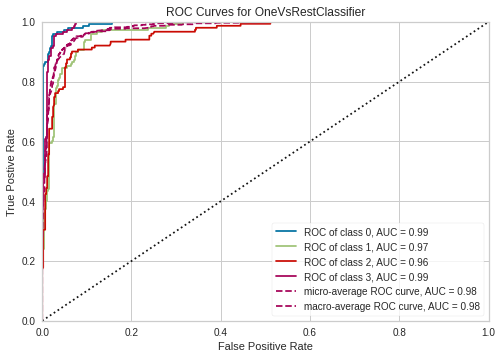

In [15]:
# auc
plot_model(bagged_dt)

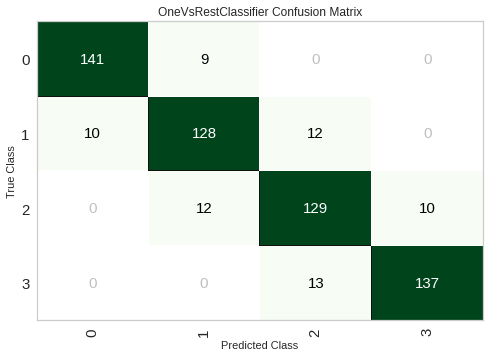

In [16]:
# confusion matrix
plot_model(bagged_dt, plot = 'confusion_matrix')

# Finalize Model 

In [20]:
final_dt = finalize_model(bagged_dt)

# Predictions

In [3]:
test = pd.read_csv('data/test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [22]:
predictions = predict_model(final_dt, data=test)

In [23]:
predictions.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Label,Score
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,1412,3476,12,7,2,0,1,0,3,0.9895
1,2,841,1,0.5,1,4,1,61,0.8,191,...,857,3895,6,0,7,1,0,0,3,0.9263
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1366,2396,17,10,10,0,1,1,2,0.5607
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,1752,3893,10,0,7,1,1,0,3,1.0000
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,810,1773,15,8,7,1,0,1,1,0.9457
